In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import string

In [24]:
log_dir = "../evaluation_results/runtime"
logs = pd.concat([pd.read_csv(os.path.join(log_dir, f), delimiter="; ") for f in os.listdir(log_dir)], axis=0)

/tmp/ipykernel_2155907/1935416727.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  logs = pd.concat([pd.read_csv(os.path.join(log_dir, f), delimiter="; ") for f in os.listdir(log_dir)], axis=0)
/tmp/ipykernel_2155907/1935416727.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  logs = pd.concat([pd.read_csv(os.path.join(log_dir, f), delimiter="; ") for f in os.listdir(log_dir)], axis=0)
/tmp/ipykernel_2155907/1935416727.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as reg

In [26]:
logs["t_matching [s]"].replace({-1: np.nan}, inplace=True)

/tmp/ipykernel_2155907/2051053377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  logs["t_matching [s]"].replace({-1: np.nan}, inplace=True)


In [55]:
nn_runtime_logs = logs.drop(["t_matching [s]"], axis=1)

In [56]:
n_var_values = nn_runtime_logs["n_var"].unique()

In [58]:
nn_runtime_logs

,k,n_obs,n_var,t_NN [s]
0,1000,5000,2,51.754880
1,1000,5000,100,27.145984
2,1000,5000,1000,30.645719
3,1000,5000,2000,35.224199
4,1000,5000,5000,44.223041
...,...,...,...,...
25,500,100000,2,265.662791
26,500,100000,100,328.417714
27,500,100000,1000,429.556195
28,500,100000,2000,495.201863


In [38]:
gt_runtime_logs = logs.dropna().drop(["n_var", "t_NN [s]"], axis=1)
gt_runtime_logs.sort_values(["k", "n_obs"])

1442.171132

In [103]:
palette = sns.color_palette("viridis", len(logs["k"].unique()))

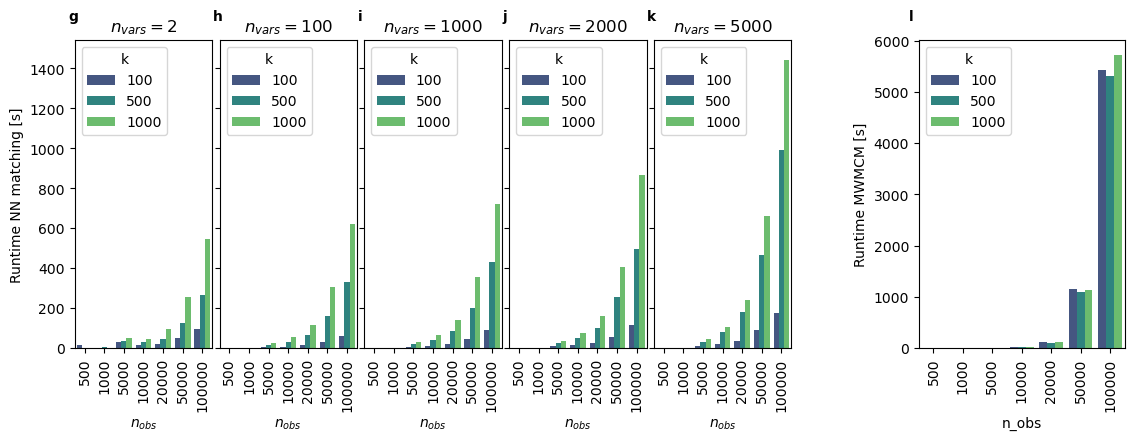

In [173]:
f, axs = plt.subplots(1, len(n_var_values) + 1, figsize=(12, 4), sharex=True, width_ratios=[1, 1, 1, 1, 1, 1.5])
y_lim_max = nn_runtime_logs["t_NN [s]"].max() + 100

for i, n_var in enumerate(n_var_values):
    sns.barplot(nn_runtime_logs[nn_runtime_logs["n_var"] == n_var], x="n_obs", y="t_NN [s]", hue="k", ax=axs[i], palette=palette)
    axs[i].legend(loc='upper left', title="k")
    if i == 0:
        axs[i].set_ylabel("Runtime NN matching [s]")
    else:
        axs[i].set_ylabel(None)
        axs[i].set_yticklabels([])
    axs[i].set_ylim(0, y_lim_max) 
    axs[i].set_xlabel("$n_{{obs}}$")
    axs[i].set_title(f"$n_{{vars}}={n_var}$")

sns.barplot(gt_runtime_logs, x="n_obs", y="t_matching [s]", hue="k", ax=axs[-1], palette=palette)
axs[-1].legend(loc='upper left', title="k")
axs[-1].set_ylabel("Runtime MWMCM [s]")
plt.subplots_adjust(wspace=0.05)

pos = axs[-1].get_position()  # Get current position
axs[-1].set_position([pos.x0 + 0.1, pos.y0, pos.width, pos.height])  # Shift right by 0.05

labels = string.ascii_lowercase
for i in range(len(n_var_values) + 1):
    axs[i].text(
        -0.05, 1.1,  # Position (normalized figure coordinates)
        labels[i+6],   # Corresponding letter
        transform=axs[i].transAxes,  # Relative to subplot
        fontsize=10, fontweight='bold', va='top', ha='left'
    )
    axs[i].tick_params(axis='x', labelrotation=90)

plt.savefig("../plots/fig2/fig2-2.pdf", bbox_inches="tight")